In [15]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import norm, t
import pandas as pd
import numpy as np
import os


In [16]:
prost_cancer_df = pd.read_csv(os.path.join('data', 'prostate_cancer.csv'))
prost_cancer_df

resp_names = ['lpsa']
var_names  = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']


In [17]:
prost_cancer_df[resp_names+var_names]

,lpsa,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-0.430783,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0
1,-0.162519,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0
2,-0.162519,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20
3,-0.162519,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0
4,0.371564,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0
...,...,...,...,...,...,...,...,...,...
92,4.385147,2.830268,3.876396,68,-1.386294,1,1.321756,7,60
93,4.684443,3.821004,3.896909,44,-1.386294,1,2.169054,7,40
94,5.143124,2.907447,3.396185,52,-1.386294,1,2.463853,7,10
95,5.477509,2.882564,3.773910,68,1.558145,1,1.558145,7,80


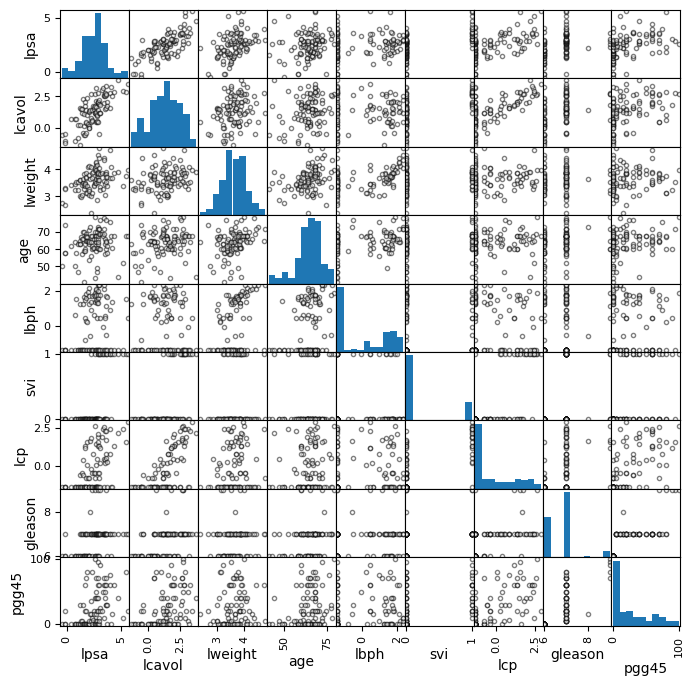

In [18]:
pd.plotting.scatter_matrix(prost_cancer_df[resp_names+var_names],
                            figsize    = (8, 8),
                            facecolors = "w",
                            edgecolors = "k")
plt.savefig(os.path.join('figures', 'cancer_scatter_matrix.png'),
                    dpi=300, transparent=True, bbox_inches = 'tight')



In [19]:
train_df = prost_cancer_df[prost_cancer_df.train=="T"]
test_df  = prost_cancer_df[prost_cancer_df.train=="F"]

y_train = train_df[resp_names].values
X_train = train_df[var_names].values

y_test = test_df[resp_names].values
X_test = test_df[var_names].values

In [20]:
def residual_sum_of_squares(y, y_hat):
    return np.sum((y - y_hat)**2)

def linear_regression(X_train, y_train, X_test, y_test):
    X    = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    beta = np.linalg.pinv(X.T @ X) @ X.T @ y_train

    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    y_hat       = X @ beta
    y_hat_test  = X_test @ beta

    return residual_sum_of_squares(y_hat_test, y_test)



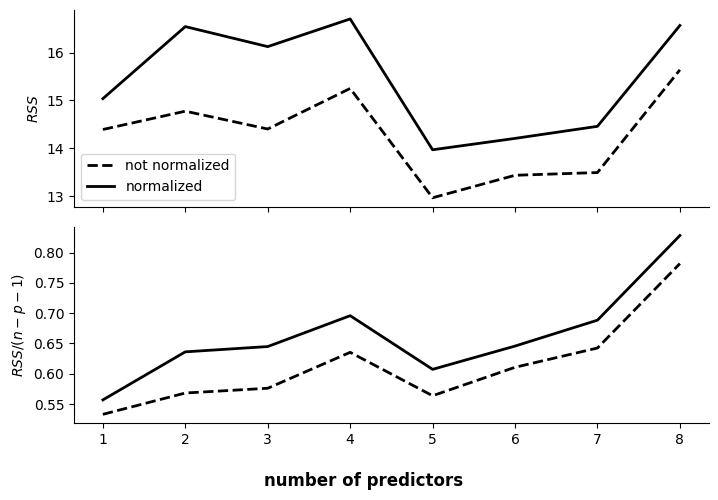

In [21]:

def normalize_data(x):
    x = x - np.mean(x, axis=0)
    x = x / np.std(x, axis=0)
    return x

number_of_predictors = 8
rss_raw_all          = np.full(number_of_predictors, np.nan)

rss_all      = np.full(number_of_predictors, np.nan)
norm_rss     = np.full(number_of_predictors, np.nan)
norm_raw_rss = np.full(number_of_predictors, np.nan)

for i in range(1, number_of_predictors+1):

    x_train = normalize_data(X_train[:, :i])
    x_test  = normalize_data(X_test[:, :i])

    rss_raw = linear_regression(X_train[:, :i], y_train, X_test[:, :i], y_test)
    rss     = linear_regression(x_train, y_train, x_test, y_test)

    n = len(y_test)
    p = i+1

    rss_all[i-1]      = rss
    rss_raw_all[i-1]  = rss_raw
    norm_rss[i-1]     = rss / (n-p-1)
    norm_raw_rss[i-1] = rss_raw / (n-p-1)

fig, ax = plt.subplots(2, 1, figsize=(7.2, 5), sharex=True)
ax[0].plot(range(1, number_of_predictors+1), rss_raw_all, label="not normalized", color="k", ls="--", lw=2)
ax[0].plot(range(1, number_of_predictors+1), rss_all, label="normalized", color="k", lw=2)

ax[1].plot(range(1, number_of_predictors+1), norm_raw_rss, label="RSS", color="k", ls="--", lw=2)
ax[1].plot(range(1, number_of_predictors+1), norm_rss, label="RSS", color="k", lw=2)

fig.supxlabel("number of predictors", weight="bold")

ax[1].set_ylabel(r"$RSS/(n-p-1)$", weight="bold")
ax[0].set_ylabel(r"$RSS$", weight="bold")
ax[0].legend()

for axi in ax.flatten():
    axi.spines["right"].set_visible(False)
    axi.spines["top"].set_visible(False)

plt.tight_layout()

fig.savefig(os.path.join('figures', 'cancer_rss.png'))

/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_18591/2161839983.py:3: RuntimeWarning: invalid value encountered in divide
  x = x / np.std(x, axis=0)
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_18591/2161839983.py:3: RuntimeWarning: divide by zero encountered in divide
  x = x / np.std(x, axis=0)
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_18591/443407558.py:6: RuntimeWarning: invalid value encountered in matmul
  beta = np.linalg.pinv(X.T @ X) @ X.T @ y_train


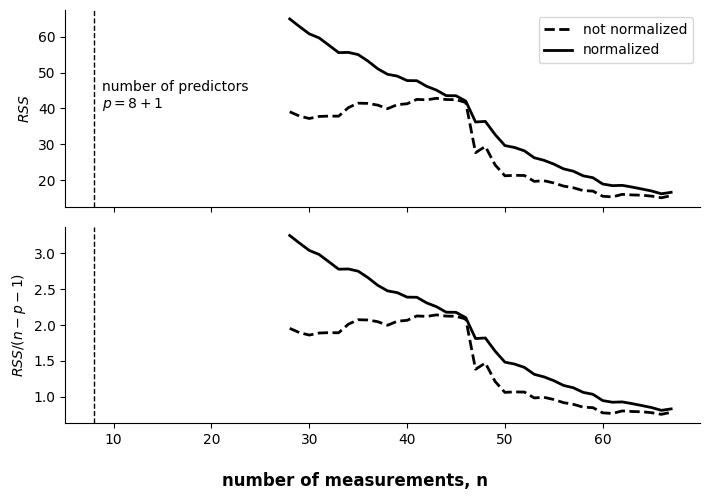

In [22]:
number_of_meas   = len(X_train)
rss_raw_all      = np.full(number_of_meas, np.nan)

rss_all      = np.full(number_of_meas, np.nan)
norm_rss     = np.full(number_of_meas, np.nan)
norm_raw_rss = np.full(number_of_meas, np.nan)

for i in range(2, number_of_meas+1):
    try:
        x_train = normalize_data(X_train[:i, :])
        x_test  = normalize_data(X_test[:, :])

        rss_raw = linear_regression(X_train[:i, :], y_train[:i], X_test[:, :], y_test)
        rss     = linear_regression(x_train, y_train[:i], x_test, y_test)

        n = len(y_test)
        p = x_train.shape[1]+1

        rss_all[i-1]      = rss
        rss_raw_all[i-1]  = rss_raw
        norm_rss[i-1]     = rss / (n-p-1)
        norm_raw_rss[i-1] = rss_raw / (n-p-1)
    except:
        n = len(y_test)
        p = i+1

        rss_all[i-1]      = np.nan
        rss_raw_all[i-1]  = np.nan
        norm_rss[i-1]     = np.nan
        norm_raw_rss[i-1] = np.nan

fig, ax = plt.subplots(2, 1, figsize=(7.2, 5), sharex=True)

ax[0].plot(range(1, number_of_meas+1), rss_raw_all, label="not normalized", color="k", ls="--", lw=2)
ax[0].plot(range(1, number_of_meas+1), rss_all, label="normalized", color="k", lw=2)
#----#----#----#----#
ax[1].plot(range(1, number_of_meas+1), norm_raw_rss, label="RSS", color="k", ls="--", lw=2)
ax[1].plot(range(1, number_of_meas+1), norm_rss, label="RSS", color="k", lw=2)

fig.supxlabel("number of measurements, n", weight="bold")

ax[1].set_ylabel(r"$RSS/(n-p-1)$", weight="bold")
ax[0].set_ylabel(r"$RSS$", weight="bold")
ax[0].legend()

ax[0].axvline(8, lw=1, ls="--", color="k")
ax[1].axvline(8, lw=1, ls="--", color="k")

ax[0].text(8.8, 40, "number of predictors\n"+r"$p=8+1$", )

for axi in ax.flatten():
    axi.spines["right"].set_visible(False)
    axi.spines["top"].set_visible(False)

plt.tight_layout()
fig.savefig(os.path.join('figures', 'cancer_rss_n.png'))

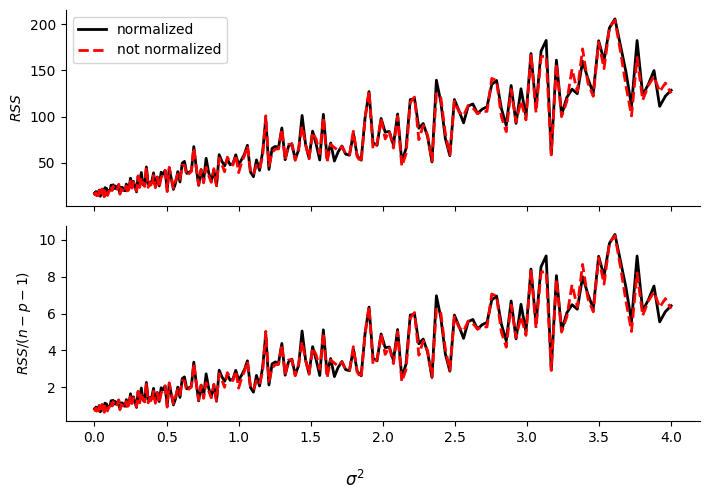

In [23]:
std_range = np.arange(0, 2+0.01, 0.01)

number_of_std   = len(std_range)
rss_raw_all      = np.full(number_of_std, np.nan)

rss_all      = np.full(number_of_std, np.nan)
norm_rss     = np.full(number_of_std, np.nan)
norm_raw_rss = np.full(number_of_std, np.nan)

for i, std in enumerate(std_range):

    x_train = normalize_data(X_train)
    x_test  = normalize_data(X_test)

    y_train_σ = y_train + std*np.random.normal(0, 1, y_train.shape)
    y_test_σ  = y_test  + std*np.random.normal(0, 1, y_test.shape)

    rss_raw = linear_regression(X_train, y_train_σ, X_test, y_test_σ)
    rss     = linear_regression(x_train, y_train_σ, x_test, y_test_σ)

    n = len(y_test)
    p = x_train.shape[1]+1

    rss_all[i]      = rss
    rss_raw_all[i]  = rss_raw
    norm_rss[i]     = rss / (n-p-1)
    norm_raw_rss[i] = rss_raw / (n-p-1)

fig, ax = plt.subplots(2, 1, figsize=(7.2, 5), sharex=True)

ax[0].plot(std_range**2, rss_all, label="normalized", color="k", lw=2)
ax[0].plot(std_range**2, rss_raw_all, label="not normalized", color="r", ls="--", lw=2)

ax[1].plot(std_range**2, norm_rss, label="RSS", color="k", lw=2)
ax[1].plot(std_range**2, norm_raw_rss, label="RSS", color="r", ls="--", lw=2)

fig.supxlabel(r"$\sigma^2$", weight="bold")

ax[1].set_ylabel(r"$RSS/(n-p-1)$", weight="bold")
ax[0].set_ylabel(r"$RSS$", weight="bold")
ax[0].legend()

#ax[0].axvline(8, lw=1, ls="--", color="k")
#ax[1].axvline(8, lw=1, ls="--", color="k")

#ax[0].text(8.8, 40, "number of predictors\n"+r"$p=8+1$", )

for axi in ax.flatten():
    axi.spines["right"].set_visible(False)
    axi.spines["top"].set_visible(False)

plt.tight_layout()
fig.savefig(os.path.join('figures', 'cancer_rss_sigma.png'))

In [36]:
number_of_meas   = len(X_train)

rss_all      = np.full((number_of_predictors, number_of_meas), np.nan)
rss_raw_all  = np.full((number_of_predictors, number_of_meas), np.nan)

norm_rss     = np.full((number_of_predictors, number_of_meas), np.nan)
norm_raw_rss = np.full((number_of_predictors, number_of_meas), np.nan)

for ip in range(1, number_of_predictors+1):
    for i in range(2, number_of_meas+1):
        try:

            x_train = normalize_data(X_train[:i, :ip])
            x_test  = normalize_data(X_test[:, :ip])

            rss_raw = linear_regression(X_train[:i, :ip], y_train[:i], X_test[:, :ip], y_test)
            rss     = linear_regression(x_train, y_train[:i], x_test, y_test)

            n = len(y_test)
            p = x_train.shape[1]+1

            rss_all[ip, i-1]      = rss
            rss_raw_all[ip, i-1]  = rss_raw
            norm_rss[ip, i-1]     = rss / (n-p-1)
            norm_raw_rss[ip, i-1] = rss_raw / (n-p-1)
        except:
            continue

/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_18591/2161839983.py:3: RuntimeWarning: invalid value encountered in divide
  x = x / np.std(x, axis=0)
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_18591/2161839983.py:3: RuntimeWarning: divide by zero encountered in divide
  x = x / np.std(x, axis=0)
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_18591/443407558.py:6: RuntimeWarning: invalid value encountered in matmul
  beta = np.linalg.pinv(X.T @ X) @ X.T @ y_train


<Axes: >

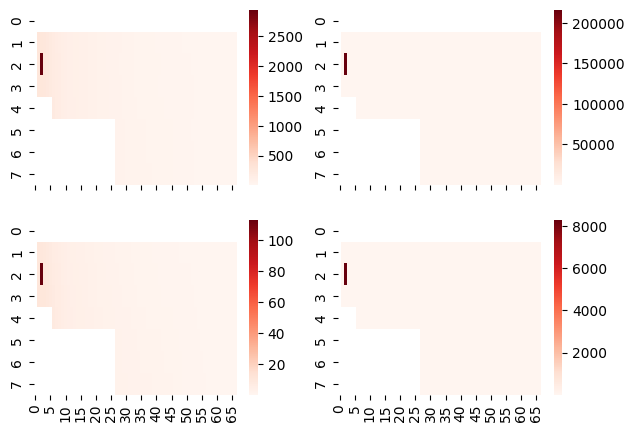

In [37]:
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(7.2, 5), sharex=True)
sns.heatmap(ax=ax[0, 0], data=rss_all, cmap="Reds")
sns.heatmap(ax=ax[0, 1], data=rss_raw_all, cmap="Reds")

sns.heatmap(ax=ax[1, 0], data=norm_rss, cmap="Reds")
sns.heatmap(ax=ax[1, 1], data=norm_raw_rss, cmap="Reds")

In [35]:
rss_raw_all.shape

(67,)

In [2]:
library(tidyverse)

data <- read_csv("data/prostate_cancer.csv")
data


Rows: 97 Columns: 11


-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (10): id, lcavol, lweight, age, lbph, svi, lcp, gleason, pgg45, lpsa
lgl  (1): train

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,-0.5798185,2.769459,50,-1.3862944,0,-1.38629436,6,0,-0.4307829,TRUE
2,-0.9942523,3.319626,58,-1.3862944,0,-1.38629436,6,0,-0.1625189,TRUE
3,-0.5108256,2.691243,74,-1.3862944,0,-1.38629436,7,20,-0.1625189,TRUE
4,-1.2039728,3.282789,58,-1.3862944,0,-1.38629436,6,0,-0.1625189,TRUE
5,0.7514161,3.432373,62,-1.3862944,0,-1.38629436,6,0,0.3715636,TRUE
6,-1.0498221,3.228826,50,-1.3862944,0,-1.38629436,6,0,0.7654678,TRUE
7,0.7371641,3.473518,64,0.6151856,0,-1.38629436,6,0,0.7654678,FALSE
8,0.6931472,3.539509,58,1.5368672,0,-1.38629436,6,0,0.8544153,TRUE
9,-0.7765288,3.539509,47,-1.3862944,0,-1.38629436,6,0,1.0473190,FALSE


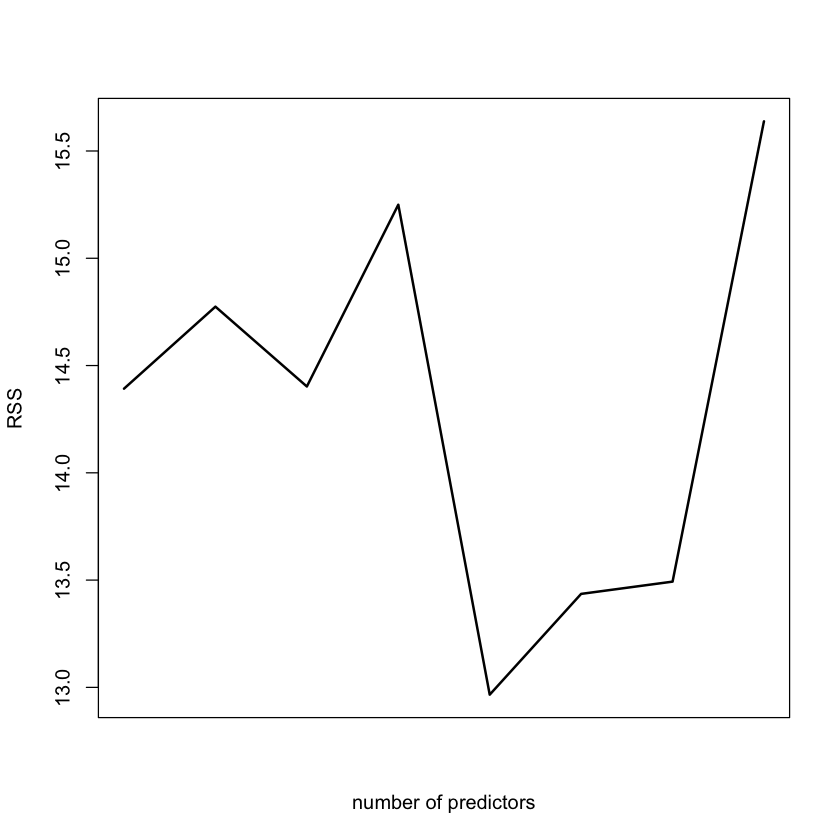

In [6]:
data_train <- data %>% filter(train == TRUE)
data_test  <- data %>% filter(train == FALSE)

model_train <- lm(lpsa ~ lcavol, data=data_train)
test_pred   <- predict(model_train, newdata=data_test)
rss0        <- sum((data_test$lpsa - test_pred)**2)

model_train <- lm(lpsa ~ lweight+lcavol, data=data_train)
test_pred   <- predict(model_train, newdata=data_test)
rss1        <- sum((data_test$lpsa - test_pred)**2)

model_train <- lm(lpsa ~ lweight+lcavol+age, data=data_train)
test_pred   <- predict(model_train, newdata=data_test)
rss2        <- sum((data_test$lpsa - test_pred)**2)

model_train <- lm(lpsa ~ lweight+lcavol+age+lbph, data=data_train)
rss3        <- sum((data_test$lpsa -  predict(model_train, newdata=data_test))**2)

model_train <- lm(lpsa ~ lweight+lcavol+age+lbph+svi, data=data_train)
rss4        <- sum((data_test$lpsa -  predict(model_train, newdata=data_test))**2)

model_train <- lm(lpsa ~ lweight+lcavol+age+lbph+svi+lcp, data=data_train)
rss5        <- sum((data_test$lpsa -  predict(model_train, newdata=data_test))**2)

model_train <- lm(lpsa ~ lweight+lcavol+age+lbph+svi+lcp+gleason, data=data_train)
rss6        <- sum((data_test$lpsa -  predict(model_train, newdata=data_test))**2)

model_train <- lm(lpsa ~ lweight+lcavol+age+lbph+svi+lcp+gleason+pgg45, data=data_train)
rss7        <- sum((data_test$lpsa -  predict(model_train, newdata=data_test))**2)

rss_all <- c(rss0, rss1, rss2, rss3, rss4, rss5, rss6, rss7)

plot(rss_all,
    type = "l",
    col  = "black",
    lwd  = 2,
    xlab = "number of predictors",
    ylab = "RSS",
    xaxt = "n")